# Implementing convolutional layers

### Improving the Fashion classifier with convolutions

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 1. Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. Preprocess the data
# Reshaping data to add a channel dimension (1 channel for grayscale images)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (to categorical format)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Build the CNN model
model = models.Sequential()

# Convolutional Layer 1: 32 filters, 3x3 kernel, 'relu' activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Pooling Layer 1: 2x2 max pooling
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2: 64 filters, 3x3 kernel, 'relu' activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Pooling Layer 2: 2x2 max pooling
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps to a 1D vector (to feed into fully connected layers)
model.add(layers.Flatten())

# Fully connected (dense) layer with 128 neurons and 'relu' activation
model.add(layers.Dense(128, activation='relu'))

# Output layer: 10 neurons (one for each class) with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Print the model summary
model.summary()

# 6. Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

2024-11-12 11:50:57.816286: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 8s 9ms/step - loss: 0.4762 - accuracy: 0.8278 - val_loss: 0.3792 - val_accuracy: 0.8567
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.3131 - accuracy: 0.8846 - val_loss: 0.3057 - val_accuracy: 0.8895
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2671 - accuracy: 0.9008 - val_loss: 0.3202 - val_accuracy: 0.8851
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2383 - accuracy: 0.9117 - val_loss: 0.2861 - val_accuracy: 0.8918
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2160 - accuracy: 0.9200 - val_loss: 0.2548 - val_accuracy: 0.9103
313/313 - 1s - loss: 0.2548 - accuracy: 0.9103 - 537ms/epoch - 2ms/step
Test accuracy: 0.9103000164031982


* 1. Loading the Data
* fashion_mnist.load_data(): This loads the Fashion MNIST dataset, which contains 60,000 training images and 10,000 test images of 28x28 grayscale clothing images, along with their corresponding labels (10 classes).

* 2. Preprocessing the Data
* Reshaping: Fashion MNIST images are 28x28 grayscale images. We reshape the data to add a channel dimension (for grayscale images, this is 1 channel) because CNNs expect inputs of shape (height, width, channels).
* Normalization: The pixel values of the images are scaled from the range [0, 255] to [0, 1] by dividing by 255. This helps improve training performance.
* One-Hot Encoding: The labels (y_train and y_test) are one-hot encoded because we are performing multi-class classification. The dataset has 10 classes, so the labels are converted to vectors of length 10 with a 1 in the index corresponding to the correct class.

* 3. Building the CNN Model
* model = models.Sequential()
* Sequential(): We initialize a sequential model, which means the layers will be added one after another.
* First Convolutional Layer: Conv2D(32, (3, 3)): Adds a 2D convolutional layer with 32 filters, each of size 3x3.
* activation='relu': Applies the ReLU (Rectified Linear Unit) activation function, which is commonly used in CNNs for non-linearity.
* input_shape=(28, 28, 1): Specifies the shape of the input data (28x28 grayscale images).
* First Pooling Layer: MaxPooling2D((2, 2)): Adds a max pooling layer with a 2x2 window. Max pooling helps downsample the feature map by selecting the maximum value from each 2x2 region.
* Second Convolutional Layer: Conv2D(64, (3, 3)): Adds another convolutional layer, but this time with 64 filters of size 3x3. More filters allow the model to learn more complex features.
* Second Pooling Layer: Another 2x2 max pooling layer that reduces the size of the feature map further.
* Flatten Layer: Flattens the 2D feature map into a 1D vector. This is required before passing the data to the fully connected layers (dense layers).
* Fully Connected (Dense) Layer: Dense(128): Adds a fully connected layer with 128 neurons.
* Output Layer: Dense(10): Adds the output layer with 10 neurons, corresponding to the 10 classes in the Fashion MNIST dataset. activation='softmax': Uses the softmax activation function, which converts the outputs into probabilities (i.e., values between 0 and 1 that sum to 1).

* 4. Compiling the Model

* 5. Model Summary: model.summary() summary(): Prints a summary of the model, including the number of parameters in each layer and the overall architecture.

* 6. Training the Model

7. Evaluating the Model
* verbose=2: Controls the verbosity of the output (2 gives a less detailed output).

## Pooling 

* Pooling is a downsampling operation used in CNNs to reduce the spatial dimensions (height and width) of feature maps.

* The most common pooling operation is max pooling, where a window (e.g., 2x2) slides over the image, and the maximum value within the window is selected.

* Stride determines how far the window moves. For a 2x2 window with stride 2, the image is reduced by half in both height and width.

* 2. Edge Pixels and Pooling: Edge pixels (at the border of the image) may not have a full neighborhood (i.e., a full 2x2 window) to pool over.
* In valid padding (no padding), these edge pixels are excluded from the pooling operation because the pooling window cannot fit fully at the borders.
* As a result, the image size is reduced by less than expected at the edges (e.g., a 28x28 image becomes 14x14 after 2x2 pooling).

* 3. Padding Options:
* Valid Padding: No extra pixels are added around the image, so pooling only happens in areas where the pooling window fully fits. This can lead to smaller output sizes (e.g., 28x28 -> 14x14).
* Same Padding: Extra pixels (often zeros) are added to the edges to make sure every pixel, including edge pixels, can be pooled. This ensures the pooling window always has a full neighborhood to operate on.

* 4. Example:
* 2x2 Max Pooling on a 5x5 image with stride 2 will reduce the image to 2x2, excluding the last row and column if using valid padding (no padding).
* Key Takeaway: Pooling reduces the image size by downsampling, and edge pixels may be excluded if there’s no padding (valid padding). Padding techniques can be used to handle edge pixels, ensuring the pooling window always fits fully.

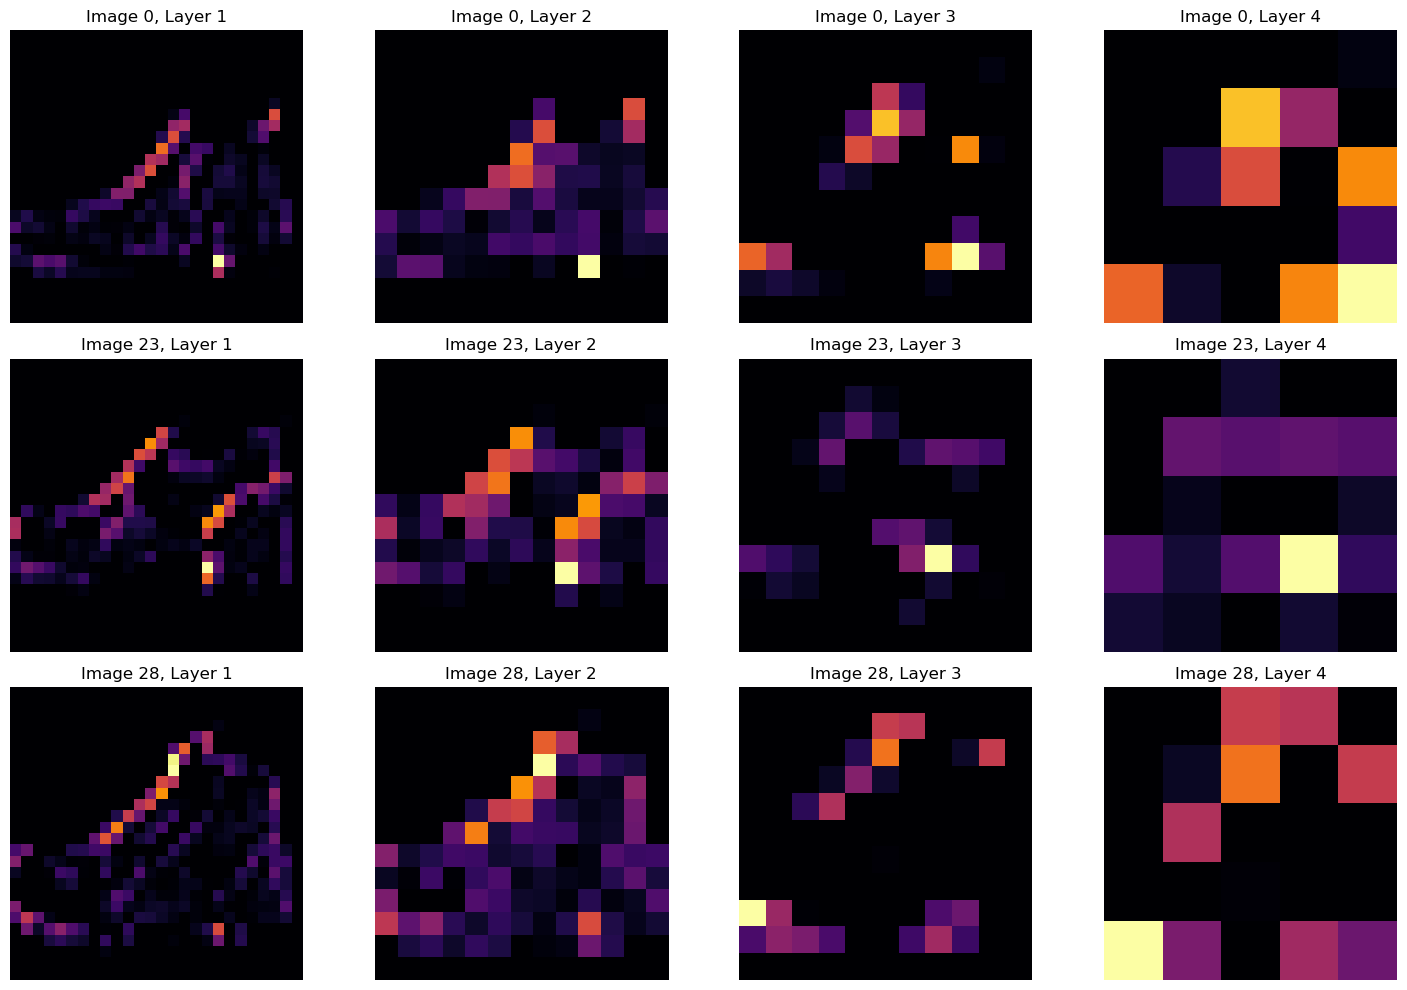

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Define the image indices you want to visualize
First_image = 0
Second_image = 23
Third_image = 28

# Define the convolution number (index of the filter you want to visualize)
Convolution_number = 1

# Specify the layers you want to visualize
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

# Get the layer outputs for the specified layers
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tuple(layers_to_visualize))]

# Create a new model that outputs the activations of these layers
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

# Prepare a figure for visualization
f, axarr = plt.subplots(3, len(layer_outputs), figsize=(15, 10))

# Process the images and display the activations
for x in range(len(layer_outputs)):
    # Get activations for the three selected images
    f1 = activation_model.predict(x_test[First_image].reshape(1, 28, 28, 1), verbose=False)[x]
    f2 = activation_model.predict(x_test[Second_image].reshape(1, 28, 28, 1), verbose=False)[x]
    f3 = activation_model.predict(x_test[Third_image].reshape(1, 28, 28, 1), verbose=False)[x]

    # Plot the activations for each image and layer
    axarr[0, x].imshow(f1[0, :, :, Convolution_number], cmap='inferno')
    axarr[0, x].set_title(f"Image {First_image}, Layer {x + 1}")
    axarr[0, x].axis('off')

    axarr[1, x].imshow(f2[0, :, :, Convolution_number], cmap='inferno')
    axarr[1, x].set_title(f"Image {Second_image}, Layer {x + 1}")
    axarr[1, x].axis('off')

    axarr[2, x].imshow(f3[0, :, :, Convolution_number], cmap='inferno')
    axarr[2, x].set_title(f"Image {Third_image}, Layer {x + 1}")
    axarr[2, x].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()
